In [5]:
import numpy as np
import matplotlib.pyplot as plt
from classes import Coordinate, Region, Demands_generator, Polyhedron
from scipy import integrate, linalg

from findWorstTSPDensity import findWorstTSPDensity

a = 1 + 1
def show_density(f_tilde, region, generator, resolution=100, t=1):
    f = f_tilde
    fig = plt.figure()
    ax = fig.add_subplot(projection='polar')

    # Create the mesh in polar coordinates and compute corresponding Z.
    r = np.linspace(0, region.radius, resolution)
    p = np.linspace(0, 2*np.pi, resolution)
    R, P = np.meshgrid(r, p)
    f_vectorized = np.vectorize(f)
    Z = f_vectorized(R, P)

   # Plot the surface.
    plt.grid(False)
    ctf = ax.pcolormesh(P, R, Z, cmap=plt.colormaps['Greys'])
    ax.scatter(generator.thetas, generator.rs, c='yellow')

    # Tweak the limits and add latex math labels.
    # ax.set_xlabel(r'$X$')
    # ax.set_ylabel(r'$Y$')
    plt.colorbar(ctf)
    fig.show()
    # plt.savefig(f'figs/{dmd_index}-{t}.png')


Initialization and plot function.

Iteration 1 begins: 

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.3862953611196407
            Iterations: 1
            Function evaluations: 1
            Gradient evaluations: 1
Find analytic center: Lambdas_bar is [0. 0.], with value -1.3862953611196407, took 0.001997232437133789s.
Find upper bound: Upper bound is 1.4989323294241041, with error 9.979593861589482e-05, took 3.5442941188812256s.


d:\anaconda3\envs\py39\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
d:\anaconda3\envs\py39\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Find lower bound: Lower bound is 1.4991894322955845, with error 9.997506116164235e-05, took 13.249138832092285s.



d:\anaconda3\envs\py39\lib\site-packages\scipy\integrate\_quadpack_py.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


It took 4.976856708526611s to get vector g.

End of iteration 1.
  The whole iteration took 21.773287057876587s.

The measure of the whole region is 1.0014867632845088.


C:\Users\MIAOYIDI\AppData\Local\Temp\ipykernel_25672\2872907408.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


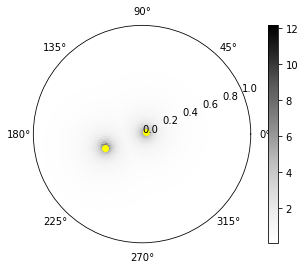

In [6]:
# np.random.seed(11)
region = Region(1)
depot = Coordinate(2, 0.3)
generator = Demands_generator(region, 2)
t, epsilon = 0.3, 1
tol = 1e-4

plot_resolution = 100


demands = generator.generate()
demands_locations = np.array([demands[i].get_cdnt() for i in range(len(demands))])
f_tilde = findWorstTSPDensity(region, demands, t, epsilon, tol)
f_tilde_area, error = integrate.dblquad(lambda r, theta: r*f_tilde(r, theta), 0, 2*np.pi, lambda _: 0, lambda _: region.radius)
print(f'The measure of the whole region is {f_tilde_area}.')
show_density(f_tilde, region, generator, plot_resolution, t)

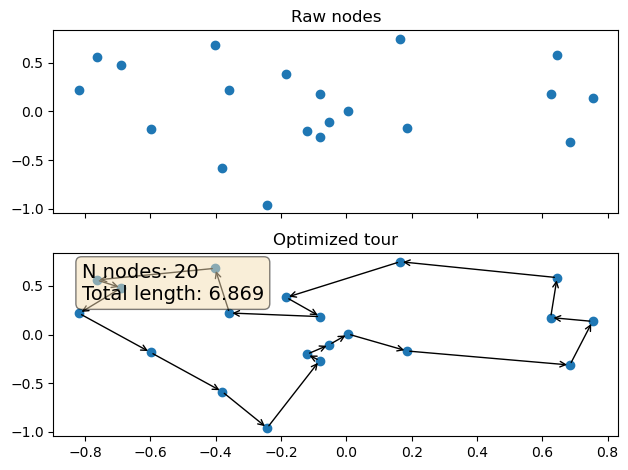

In [15]:
from python_tsp.distances import euclidean_distance_matrix
from python_tsp.exact import solve_tsp_dynamic_programming


N = 20
# positions = np.random.randn(N, 2)
positions = demands_locations
fig, ax = plt.subplots(2, sharex=True, sharey=True)         # Prepare 2 plots
ax[0].set_title('Raw nodes')
ax[1].set_title('Optimized tour')
ax[0].scatter(positions[:, 0], positions[:, 1])             # plot A
ax[1].scatter(positions[:, 0], positions[:, 1])             # plot B
start_node = 0
distance = 0.0
distance_matrix = euclidean_distance_matrix(positions)
x_sol, dis = solve_tsp_dynamic_programming(distance_matrix)
for i in range(N):
    start_pos = positions[start_node]
    next_node = x_sol[i+1] if i < N-1 else x_sol[0]
    end_pos = positions[next_node]
    ax[1].annotate("",
            xy=start_pos, xycoords='data',
            xytext=end_pos, textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
    distance += np.linalg.norm(end_pos - start_pos)
    start_node = next_node

textstr = "N nodes: %d\nTotal length: %.3f" % (N, distance)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax[1].text(0.05, 0.95, textstr, transform=ax[1].transAxes, fontsize=14, # Textbox
        verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

In [7]:
from python_tsp.distances import euclidean_distance_matrix

def plot_route(ax, route, demands, demands_locations):
    N = len(demands)
    start_node = 0
    distance = 0.0
    distance_matrix = euclidean_distance_matrix(demands_locations)
    # x_sol, dis = solve_tsp_dynamic_programming(distance_matrix)
    polar_demands_locations = np.array([[demands[k].location.theta, demands[k].location.r] for k in range(N)])
    for i in range(N):
        start_pos = polar_demands_locations[start_node]
        next_node = route[i+1] if i < N-1 else route[0]
        end_pos = polar_demands_locations[next_node]
        ax.annotate("",
                xy=start_pos, xycoords='data',
                xytext=end_pos, textcoords='data',
                arrowprops=dict(arrowstyle="->",
                                connectionstyle="arc3"))
        distance += np.linalg.norm(end_pos - start_pos)
        start_node = next_node


def plot_routes(districts):
    fig = plt.figure()
    ax = fig.add_subplot(projection='polar')
    ax.set_title('Optimized tour')
    ax.scatter(generator.thetas, generator.rs)
    distance = 0.0
    for district in districts:
        plot_route(ax, route=district.permutation, demands=district.demands_within, demands_locations=district.demands_within_locations)
        distance += district.distance
    textstr = "N nodes: %d\nTotal length: %.3f" % (N, distance)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14, # Textbox
        verticalalignment='top', bbox=props)

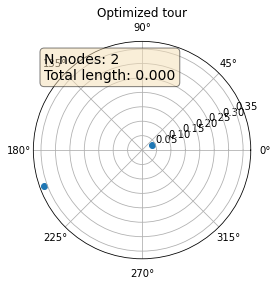

In [8]:
from partition import District, partition_demands

partition = np.array([0, 3/4*np.pi, 3/2*np.pi, 2*np.pi])
N, M = demands.shape[0], len(partition) - 1
demands_partition = partition_demands(demands, partition)
districts = [District((partition[k], partition[k+1]), demands_partition[k]) for k in range(M)]
districts_tsp = [dist.find_optimal_tsp_solution() for dist in districts]
plot_routes(districts)
# plot_route(districts[0].permutation, districts[0].demands_within, districts[0].demands_within_locations)

In [9]:
f_tilde

<function findWorstTSPDensity.findWorstTSPDensity.<locals>.<lambda>(r, theta)>